<a href="https://colab.research.google.com/github/addishp/QTM350_aws_project/blob/main/QTM_350_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import itertools
import warnings
import matplotlib.pyplot as plt


In [ ]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/addishp/QTM350_aws_project/main/final-data-updated2.csv',index_col=0)
sc_labels = pd.read_csv('https://raw.githubusercontent.com/addishp/QTM350_aws_project/main/image_skin_color_labels.csv', index_col = 0)

Our dataframe's features are from the output of AWS Rekognition. We created white_nonwhite labels for the portraits of each image and add this as a column to our dataset.

In [ ]:
sc_labels

,filename,white_non_white_label
label_index,,
0,portrait_1.jpg,white
1,portrait_2.jpg,white
2,portrait_3.jpg,white
3,portrait_4.jpg,white
4,portrait_5.jpg,white
...,...,...
170,portrait_175.jpg,white
171,portrait_176.jpg,white
172,portrait_177.jpg,white


In [ ]:
dataframe['sc_label'] = sc_labels['white_non_white_label']

In [ ]:
dataframe.columns

Index(['filename', 'ageLow', 'ageHigh', 'gender', 'genderConfidence',
       'emotion', 'emotionConfidence', 'b_filename', 'b_ageLow', 'b_ageHigh',
       'b_gender', 'b_genderConf', 'b_emotion', 'b_emotionConf', 'sc_label'],
      dtype='object')

#Data Analysis

### Data Exploration

In [ ]:
dataframe.head(6)

,filename,ageLow,ageHigh,gender,genderConfidence,emotion,emotionConfidence,b_filename,b_ageLow,b_ageHigh,b_gender,b_genderConf,b_emotion,b_emotionConf,sc_label
0,portrait_1.jpg,18,30,Female,92.99,CALM,63.34,portrait_1_blurred.jpg,13,23,Female,99.63,CALM,84.28,white
1,portrait_2.jpg,13,25,Female,99.98,HAPPY,99.99,portrait_2_blurred.jpg,19,31,Female,99.98,HAPPY,99.99,white
2,portrait_3.jpg,22,34,Male,98.97,HAPPY,86.23,portrait_3_blurred.jpg,23,37,Male,97.53,HAPPY,96.63,white
3,portrait_4.jpg,21,33,Male,99.89,CALM,72.04,portrait_4_blurred.jpg,20,32,Male,99.65,CALM,94.40,white
4,portrait_5.jpg,22,34,Female,99.58,CALM,50.50,portrait_5_blurred.jpg,23,35,Female,99.37,CALM,54.59,white
5,portrait_6.jpg,29,45,Male,99.73,CALM,97.31,portrait_6_blurred.jpg,26,42,Male,99.49,CALM,98.48,non_white


In [ ]:
meta_data = dataframe[['filename','b_filename']]
dataframe = dataframe.drop(labels = ['filename','b_filename'], axis = 1)

In [ ]:
summary = dataframe.describe()
print('These are the summary stats for our collected data')
summary

These are the summary stats for our collected data


,ageLow,ageHigh,genderConfidence,emotionConfidence,b_ageLow,b_ageHigh,b_genderConf,b_emotionConf
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,22.977143,35.817143,92.503257,82.092000,22.074286,34.662857,93.998171,83.783429
std,11.111739,13.595585,12.472649,18.380219,11.272496,13.587331,10.659225,17.580861
min,0.000000,3.000000,50.640000,31.240000,0.000000,3.000000,53.230000,31.300000
25%,17.000000,29.000000,93.255000,67.925000,16.000000,28.000000,95.320000,75.200000
50%,22.000000,34.000000,98.480000,89.560000,22.000000,34.000000,98.340000,91.490000
75%,24.000000,38.000000,99.525000,97.310000,23.000000,35.000000,99.530000,97.645000
max,56.000000,74.000000,99.980000,99.990000,58.000000,76.000000,99.980000,99.990000


In [ ]:
#Let's pair variables we will look at together
vars_genderConf = ['genderConfidence','b_genderConf']
vars_low_age = ['ageLow','b_ageLow'] 
vars_high_age = ['ageHigh','b_ageHigh'] 
vars_emotionConf = ['emotionConfidence','b_emotionConf']
vars_emotion = ['emotion','b_emotion']
vars_gender = ['gender', 'b_gender']

###Visualizing the distributions for variables before and after blur
Now we will look at the distributions for each variable before and after the blur.

In [ ]:
#first we want a palette of colors we can use
colors = itertools.cycle(sns.color_palette())


In [ ]:
def plot_together(dataframe, vars, colors_palette):
  #want to ignore deprecation error since I want to stack
  #different distribution of columns together
  warnings.filterwarnings("ignore", category=FutureWarning) 

  sns.histplot(dataframe[vars[0]], color = next(colors_palette), label = vars[0] )
  sns.histplot(dataframe[vars[1]], color = next(colors_palette), label = vars[1] )
  plt.title('Distribution of ' + vars[0] + ' and ' + vars[1])
  plt.legend()

In [ ]:
def get_stat(data_summary, variable, kind):
  stat = data_summary[variable][kind]
  stat = round(stat,3)
  return stat

#this will help us refer to specific stats when we look at visualizations

In [ ]:
def pct_change(whole, part):
  if whole == 0:
    return "n/a"
  change = (round(100 * (float(part) - float(whole))/float(whole), 3))
  return str(change)+"%"

In [ ]:
def get_change_overall(value1, value2, stat):
  if value2 > value1:
    statement = "The change in the " + stat + " was +" + str(round(value2-value1, 2)) + " (" + pct_change(value1,value2) + ")"
  else: 
    statement = "The change in the " + stat + " was " + str(round(value2-value1, 2)) + " (" + pct_change(value1,value2) + ")"
  return statement

# Looking at Age:

We found that the mean age high and mean age low both decreased after images were blurred. The standard deviation also decreases for both variables meaning that the distribution of ages predicted is more similar. This makes sense as the blurring filter softens wrinkles on faces and ML model would consider them to be younger. 

In the visualization, we can also see the left tail of low age shifts to the right after blurring, suggesting that people who look younger before the blurring now look a bit older to the model. This could suggest that for young people who don't have many wrinkles and spots, the blurring filter makes their facial features less apparent, so the machine is less able to detect their true age. 

###Low age variable distribution before and after blur

The mean for predicted low end of age is 22.977 before blurring and is 22.074 after blurring.
The change in the mean was -0.9 (-3.93%)
The std for predicted low end of age is 11.112 before blurring and is 11.272 after blurring.
The change in the std was +0.16 (1.44%)


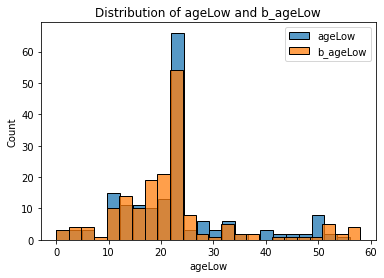

In [ ]:
vars = vars_low_age
plot_together(dataframe, vars, colors)

shared_var_name = 'low end of age'
stat = 'mean'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

stat = 'std'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

###High age variable distribution before and after blur


The mean for predicted high end of age is 35.817 before blurring and is 34.663 after blurring.
The change in the mean was -1.15 (-3.222%)

The std for predicted high end of age is 13.596 before blurring and is 13.587 after blurring.
The change in the std was -0.01 (-0.066%)


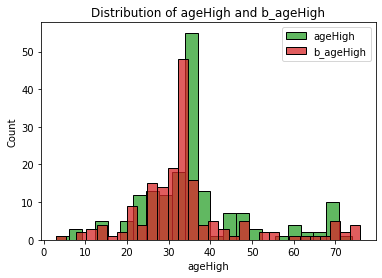

In [ ]:
vars = vars_high_age
plot_together(dataframe, vars, colors)

shared_var_name = 'high end of age'
stat = 'mean'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

print('')

stat = 'std'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)


# Looking at Emotion Confidence:

Now, we would like to use boxplot to show the distribution of the emotion confidence score before and after we blur the pictures.
1. emotionConfidence represents the machine's emotion confidence score for the picture before blurring.
2. b_emotionConf represents the machine's emotion confidence score for the picture after blurring.

For emotion, we saw that the mean confidence in the emotion predicted increases 1.7 unit after the image is blurred. We also see that the standard deviation in gender confidence scores decreases after blurring. This means that the emotion confidence score varies less after blurring. These are interesting results as it went against our guess. Our guess is that since detail is lost after blurring, AWS Rekognition should exhbit less confidence and more variations in the emotion recognition scores. 



The mean for predicted emotion confidence is 82.092 before blurring and is 83.783 after blurring.
The change in the mean was +1.69 (2.06%)

The std for predicted emotion confidence is 18.38 before blurring and is 17.581 after blurring.
The change in the std was -0.8 (-4.347%)


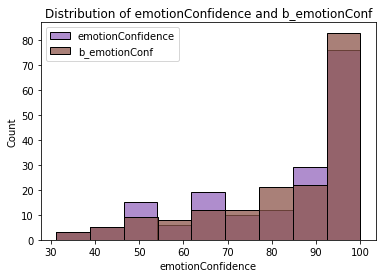

In [ ]:
vars = vars_emotionConf
plot_together(dataframe, vars, colors)

shared_var_name = 'emotion confidence'
stat = 'mean'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

print('')

stat = 'std'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

##Hypothesis Testing

To further examine the difference between the distribution of the two groups, we computed a 95% confidence interval for their means, assuming a normal distribution. Our sample size is only 100+, which is not large enough, so we choose to use T-tests. T-tests are most useful when we need to determine if there is a statistically significant difference between two independent sample groups

In [ ]:
import statsmodels.stats.api as sms

sms.DescrStatsW(dataframe['emotionConfidence']).tconfint_mean()

(79.3497255092295, 84.83427449077053)

In [ ]:
sms.DescrStatsW(dataframe['b_emotionConf']).tconfint_mean()

(81.16041598304761, 86.40644115980953)

The result shows that the confidence interval for the means of the two groups is almost identical. However, the lower limit is about two and a half units higher for scores of pictures after blurring and the upper limit is about one unit higher for scores of pictures after blurring, which is quite surprising. We expected that the mean of gender confidence scores in normal pictures should be higher than the mean of the scores in pictures after blurring.

##Scatter Plot

We also use scatter plots to visually display the relationship between the two groups of emotion confidence score. 

Text(0.5, 0, 'before blurring')

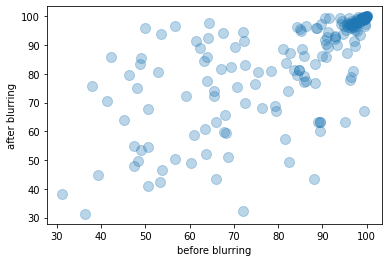

In [ ]:
plt.plot(dataframe['emotionConfidence'], dataframe['b_emotionConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.xlabel("before blurring")

As we have observed that most dots are clustered around emotoion confidence score(before blurring) >95, we created a new dataframe to display the dots in that range.

In [ ]:
df_over_95_e = dataframe[dataframe['emotionConfidence']>95]

Text(0.5, 0, 'before blurring')

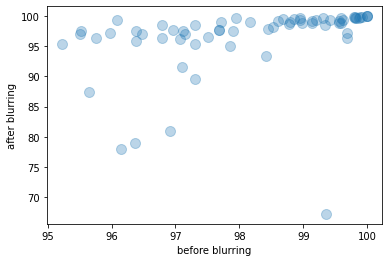

In [ ]:
plt.plot(df_over_95_e['emotionConfidence'], df_over_95_e['b_emotionConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.xlabel("before blurring")

##Regression Analysis

###Hypothesis

We proposed a question before conducting the regression analysis - if we know a picture's emotion confidence score in AWS, what will be its emotion confidence score after we apply the blurring filter? Will it increase or decrease?

Our hypothesis is that blurring the image would lower its emotion confidence score in AWS. We want to use regression analysis to answer this question. 

###All Pictures

In the following analysis, we included all pictures, and we tested the relationship between the emotion confidence score before blurring and the emotion confidence score after blurring.

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results_e = smf.ols('b_emotionConf ~ emotionConfidence', data=dataframe).fit()

In [ ]:
results_e.params

Intercept            31.031639
emotionConfidence     0.642594
dtype: float64

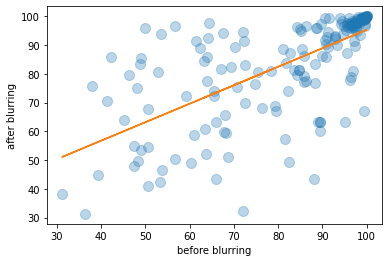

In [ ]:
plt.plot(dataframe['emotionConfidence'],dataframe['b_emotionConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.xlabel("before blurring")
plt.plot(dataframe['emotionConfidence'], results_e.predict(dataframe['emotionConfidence']))

As you could observe from the plot, we discovered a positive relationship between the emotion confidence score before blurring and the emotion confidence score after blurring. We have a regression slope of ~+0.642. A positive coefficient indicates that a picture's emotion confidence score in AWS will increase after we apply the blurring filter. Considering the range of confidence score before blurring is 100 and after blurring is also 100, +0.642 is a fairly small impact. However, this was still a surprising founding, because we expected the blurring filter to hinder the machine's ability to detect one's emotion and to lower the emotion confidence score. However, through our analysis, we found that blurring the images actually slightly improved the machine's confidence score about emotion detection. Our guess is that AWS Rekognition over simplifies some facial features when it is calculating the emotion. When we blurred the images, some facial details were lost, which made it easier for the machine to simplify the facial features and thus improved its confidence score.

###New Range

We test the same correlation with the new range - emotion confidence score(before blurring) >95

In [ ]:
results_over_95_e = smf.ols('b_emotionConf ~ emotionConfidence', data=df_over_95_e).fit()

In [ ]:
results_over_95_e.params

Intercept           -36.468214
emotionConfidence     1.355232
dtype: float64

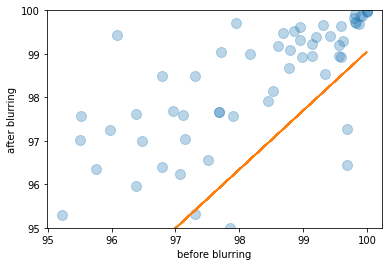

In [ ]:
plt.plot(df_over_95_e['emotionConfidence'], df_over_95_e['b_emotionConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.ylim(95,100)
plt.xlabel("before blurring")
plt.plot(df_over_95_e['emotionConfidence'], results_over_95_e.predict(df_over_95_e['emotionConfidence']))

When we only look at pictures with original emotion confidence score >95, the positive relationship is less obvious. The slope of the new regression is ~+1.36, which is a lot higher than the slop of +0.642 that we discovered using all pictures. The result again reinforces our finding that a picture's emotion confidence score in AWS will increase after we apply the blurring filter. Again, this contradicts with our original hypothesis, but supports our theory that simplifying facial features makes it easier for the machine to detect pattern and calculate emotion. 

# Looking at Gender Confidence:

For gender, we saw that the mean confidence in the gender predicted increases after the image is blurred. This was an interesting result as it went against what we thought. Since some details are lost after blurring an image, we expected AWS Rekognition to exhbit less confidence in it's gender prediction.

We do see that the standard deviation in gender confidence score increases after blurring. This may mean that the confidence varies more after blurring. This suggests that for most pictures that already have high confidence in gender score predictions, blurring helps remove details that reduce confidence in the pre-blur gender prediction. Pictures that had low gender confidence scores will result in even lower scores after blurring the image.

The mean for predicted gender confidence is 92.503 before blurring and is 93.998 after blurring.
The change in the mean was +1.5 (1.616%)

The std for predicted gender confidence is 12.473 before blurring and is 10.659 after blurring.
The change in the std was -1.81 (-14.543%)


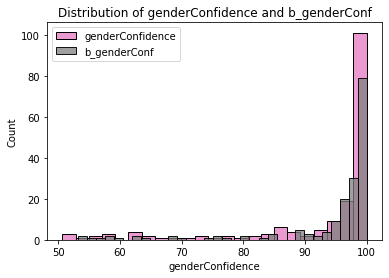

In [ ]:
vars = vars_genderConf
plot_together(dataframe, vars, colors)

shared_var_name = 'gender confidence'
stat = 'mean'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

print('')

stat = 'std'
result1 = get_stat(summary,vars[0],stat)
result2 = get_stat(summary,vars[1],stat)
print("The " + stat +  " for predicted " + shared_var_name + " is " + str(result1) + " before blurring and is " + str(result2) + " after blurring." )
change = get_change_overall(result1, result2, stat)
print(change)

In [ ]:
#Let's compare the number of males and females before and after blur
gender_pre_blur = dataframe['gender']
gender_post_blur = dataframe['b_gender']

#This is a dictionary counter and we can get the number label was repeated
gender_cnt_before = Counter(gender_pre_blur)
gender_cnt_after = Counter(gender_post_blur)

males = gender_cnt_before.get('Male')
females = gender_cnt_before.get('Female')

b_males = gender_cnt_after.get('Male')
b_females = gender_cnt_after.get('Female')

print('Before blur, AWS Rekognition predicted there are ' + str(males) + ' males and ' + str(females) + ' females in our dataset.')
print('After blur, AWS Rekognition predicted there are ' + str(b_males) + ' males and ' + str(b_females) + ' females in our dataset.')

Before blur, AWS Rekognition predicted there are 64 males and 111 females in our dataset.
After blur, AWS Rekognition predicted there are 56 males and 119 females in our dataset.


After blurring, AWS identifies more females than before. This makes sense as males have sharper facial features, and blurring the image would soften edges on male faces. Therefore, the machine would miscalculate some males as females after blurring. 

## Hypothesis Testing

To further examine the difference between the distribution of the two groups, we computed a 95% confidence interval for their means, assuming a normal distribution. Our sample size is only 100+, which is not large enough, so we choose to use T-tests. T-tests are most useful when we need to determine if there is a statistically significant difference between two independent sample groups

In [ ]:
import statsmodels.stats.api as sms

sms.DescrStatsW(dataframe['genderConfidence']).tconfint_mean()

(90.64237472842235, 94.36413955729195)

In [ ]:
sms.DescrStatsW(dataframe['b_genderConf']).tconfint_mean()

(92.40784652570919, 95.58849633143363)

The result shows that both lower limit and upper limit of confidence interval increase after we blur the image. This is quite surprising, as we expected the mean of gender confidence scores in normal pictures to be higher than it in blurred pictures. 

## Scatter Plot

We also use scatter plots to visually display the relationship between the two groups of gender confidence score. 

Text(0.5, 0, 'before blurring')

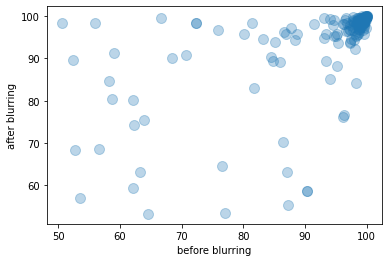

In [ ]:
plt.plot(dataframe['genderConfidence'], dataframe['b_genderConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.xlabel("before blurring")

As we have observed that most dots are clustered around gender confidence score(before blurring) ***>95***, we created a new dataframe to display the dots in that range.

In [ ]:
df_over_95_g = dataframe[dataframe['genderConfidence']>95]

Text(0.5, 0, 'before blurring')

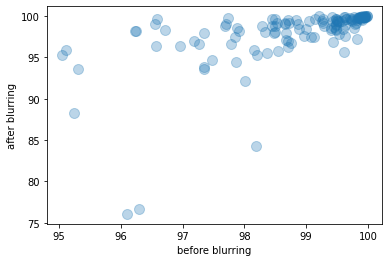

In [ ]:
plt.plot(df_over_95_g['genderConfidence'], df_over_95_g['b_genderConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.xlabel("before blurring")

## Regression Analysis

#### Hypothesis

We proposed a question before conducting the regression analysis - if we know a picture's gender confidence score in AWS, what will be its gender confidence score after we apply the blurring filter? Will it increase or decrease?

Our hypothesis is that blurring the image would lower its gender confidence score in AWS. We want to use regression analysis to answer this question. 

#### All Pictures

In the following analysis, we included all pictures, and we tested the relationship between the gender confidence score before blurring and the gender confidence score after blurring. 

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results_g = smf.ols('b_genderConf~genderConfidence ', data=dataframe).fit()

In [ ]:
results_g.params

Intercept           47.055507
genderConfidence     0.507470
dtype: float64

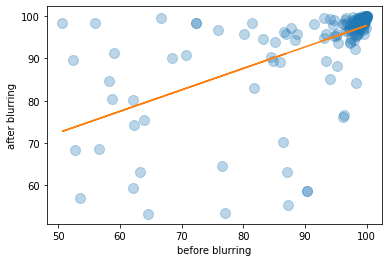

In [ ]:
plt.plot(dataframe['genderConfidence'],dataframe['b_genderConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.xlabel("before blurring")
plt.plot(dataframe['genderConfidence'], results_g.predict(dataframe['genderConfidence']))

As you could observe from the plot, we discovered a positive relationship between the gender confidence score before blurring and the gender confidence score after blurring.
We have a regression slope of +0.507. A positive coefficient indicates that a picture's gender confidence score in AWS will increase after we apply the blurring filter. 
Considering the range of confidence score before blurring is 100 and after blurring is also 100, +0.507 is a fairly small impact. However, this was still a surprising founding, because we expected the blurring filter to hinder the machine's ability to detect one's gender and to lower the gender confidence score. However, through our analysis, we found that blurring the images actually slightly improved the machine's confidence score about gender detection. Our guess is that AWS Rekognition over simplifies some facial features when it is calculating the gender. When we blurred the images, some facial details were lost, which made it easier for the machine to simplify the facial features and thus improved its confidence score. 

#### New Range

We test the same correlation with the new range - gender confidence score(before blurring) >95

In [ ]:
results_over_95_g = smf.ols('b_genderConf ~ genderConfidence', data=df_over_95_g).fit()

In [ ]:
results_over_95_g.params

Intercept          -64.314881
genderConfidence     1.642141
dtype: float64

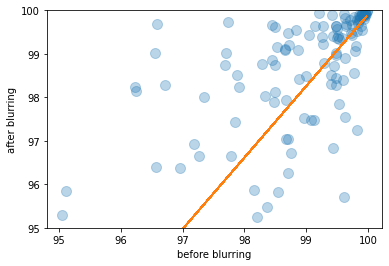

In [ ]:
plt.plot(df_over_95_g['genderConfidence'], df_over_95_g['b_genderConf'], 'o', alpha=0.3, markersize=10)
plt.ylabel("after blurring")
plt.ylim(95,100)
plt.xlabel("before blurring")
plt.plot(df_over_95_g['genderConfidence'], results_over_95_g.predict(df_over_95_g['genderConfidence']))

When we only look at pictures with original gender confidence score >95, the positive relationship is more obvious. The slope of the new regression is 1.64, which is a lot greater than the slop of 0.425 that we discovered using all pictures. The positive slope reinforces our finding that a picture's gender confidence score in AWS will increase after we apply the blurring filter. Again, this contradicts with our original hypothesis, but supports our theory that simplifying facial features makes it easier for the machine to detect pattern and calculate gender. 

#Metrics

With supervised ML models, an important metric that pops up is accuracy. With labeled data, ML models usually are trained to reduce the misclassification error. As the images are blurred, details are lost in the picture so it is worth looking at whether the ML model reproduces the same labels. So we will look at consistency as an evaluation metric. 

Inconsistency = k images / n images
where k is # of images that have the same label for a given feature before and after blurring and n = # of total images




## Label inconsistency metrics

In [ ]:
#total number of images
n_images = dataframe.shape[0] 
n_images

175

###Emotion labeling inconsistency

In [ ]:
#This is an example where gender the label is not consistent 
emotional_inconsistency = dataframe[dataframe['emotion'] != dataframe['b_emotion']].head()
emotional_inconsistency.head()

,ageLow,ageHigh,gender,genderConfidence,emotion,emotionConfidence,b_ageLow,b_ageHigh,b_gender,b_genderConf,b_emotion,b_emotionConf,sc_label
22,19,31,Female,98.52,SAD,49.03,16,28,Female,99.16,CALM,85.32,white
30,22,34,Female,97.69,FEAR,49.07,14,26,Female,98.74,DISGUSTED,53.37,white
31,21,33,Male,98.33,SAD,48.75,23,37,Male,98.04,CALM,83.34,white
36,23,37,Female,99.94,HAPPY,48.30,23,35,Female,99.91,FEAR,49.69,non_white
40,22,34,Female,94.09,SAD,49.92,20,32,Female,99.38,CALM,95.96,white


In [ ]:
#Emotion labeling inconsistency
vars = vars_emotion

k_emotion_changes = emotional_inconsistency.shape[0]
inconsistency = round((k_emotion_changes / n_images), 3)
print('There were ' + str(k_emotion_changes) + ' change(s) in emotion labeling.')
print('The inconsistency rate between emotion predictions is ' + str(inconsistency) + '.')

There were 5 change(s) in emotion labeling.
The inconsistency rate between emotion predictions is 0.029.


After blurring, we observed that AWS changes its emotion labeling on five people with the inconsistency rate of 2.9%. Among the five changes, three of them are from SAD to CALM, and one is from FEAR to DISGUESTED. These emotions all have similar facial expressions. Even a real human being may not be able to easily distinguish between them. Therefore, we could say that blurring only slightly hinders the machine's ability to detect emotions. 

###Gender labeling inconsistency

In [ ]:
#Gender labeling inconsistency
vars = vars_gender

gender_inconsistency = dataframe[dataframe[vars[0]] != dataframe[vars[1]]]
k_gender_changes = gender_inconsistency.shape[0]
inconsistency = round((k_gender_changes / n_images), 3)
print('There were ' + str(k_gender_changes) + ' change(s) in gender labeling.')
print('The inconsistency rate between gender predictions is ' + str(inconsistency) + '.')

There were 10 change(s) in gender labeling.
The inconsistency rate between gender predictions is 0.057.


As we have discussed, after blurring, AWS identifies more females than before. This makes sense as males have sharper facial features, and blurring the image would soften edges on male faces. Therefore, the machine would miscalculate some males as females after blurring. The inconsistency rate is only 5.7%, which is not a huge impact. 

###Potential age label inconsistency

We don't have exact age labels from AWS, but we can create age labels based of typical age subgroups. This labeling is based of an example of how survey tend to ask for age. Let's see how consistently AWS Rekognition manages to keep predictions within the same categories for lowAge and highAge predictions.

Typical survey age classes:

* 0 = Under 12 years old
* 1 = 12-17 years old
* 2 = 18-24 years old
* 3 = 25-34 years old
* 4 = 35-44 years old
* 5 = 45-54 years old
* 6 = 55-64 years old
* 7 = 65-74 years old
* 8 = 75 years or older

In [ ]:
#Let's make a function that returns class based on age
def get_survey_class(x):
  class_x = 0
  if 12 <= x <= 17:
    class_x = 1
  if 18 <= x <= 24:
    class_x = 2
  if 25 <= x <= 34:
    class_x = 3
  if 35 <= x <= 44:
    class_x = 4
  if 45 <= x <= 54:
    class_x = 5
  if 55 <= x <= 64:
    class_x = 6
  if 65 <= x <= 74:
    class_x = 7
  if x >= 75:
    class_x = 8
  return class_x

In [ ]:
#let's count labels that don't match for multiclass survey age labels
def count_mismatch(array1,array2):
  count = 0
  for k in range(len(array1)):
    if array1[k] != array2[k]:
      count += 1
  return count

In [ ]:
lowAge_class = []
lowAge_class_postblur = []

highAge_class = []
highAge_class_postblur = []

for x in range(n_images):
  class1 = get_survey_class(dataframe.iloc[x]['ageLow'])
  lowAge_class.append(class1)

  class2 = get_survey_class(dataframe.iloc[x]['b_ageLow'])
  lowAge_class_postblur.append(class2)

  class3 = get_survey_class(dataframe.iloc[x]['ageHigh'])
  highAge_class.append(class3)

  class4 = get_survey_class(dataframe.iloc[x]['b_ageHigh'])
  highAge_class_postblur.append(class4)

In [ ]:
lowAge_survey_mismatch = count_mismatch(lowAge_class, lowAge_class_postblur)
highAge_survey_mismatch = count_mismatch(highAge_class, highAge_class_postblur)

In [ ]:
#Survey age range consistency
inconsistency1 = round((lowAge_survey_mismatch / n_images), 3)

inconsistency2 = round((highAge_survey_mismatch / n_images), 3)

print('The inconsistency rate between lowAge labels using typical survey ranges is ' + str(inconsistency1))
print('The inconsistency rate between highAge labels using typical survey ranges is ' + str(inconsistency2))
print('This is based off of hypothetical age range labels. Typically, we would see these kind of ranges or stages of life: child, young adult, adult, elderly, etc.')

The inconsistency rate between lowAge labels using typical survey ranges is 0.24
The inconsistency rate between highAge labels using typical survey ranges is 0.263
This is based off of hypothetical age range labels. Typically, we would see these kind of ranges or stages of life: child, young adult, adult, elderly, etc.


#Second look at our main variables by skin color labeling

In [ ]:
dataframe['sc_label']

0      white
1      white
2      white
3      white
4      white
       ...  
170    white
171    white
172    white
173    white
174    white
Name: sc_label, Length: 175, dtype: object

In [ ]:
dataframe['sc_label'].value_counts()

white        129
non_white     46
Name: sc_label, dtype: int64

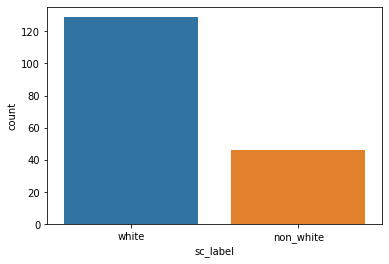

In [ ]:
import seaborn as sns
sns.countplot('sc_label', data=dataframe)

# Age

## Distribution Comparison

In [ ]:
#seperating dataframe for each skin label
white_df = dataframe[dataframe['sc_label']=='white']
non_white_df = dataframe[dataframe['sc_label']=='non_white']
#getting summary stats for by label
white_df_summary = white_df.describe()
non_white_summary = non_white_df.describe()

###Age low var

The mean for ageLow predicted for our white group BEFORE blurring is: 23.14
The mean for ageLow predicted for our non_white group BEFORE blurring is: 22.522

The std for ageLow predicted for our white group BEFORE blurring is: 11.67
The std for ageLow predicted for our non_white group BEFORE blurring is: 9.475


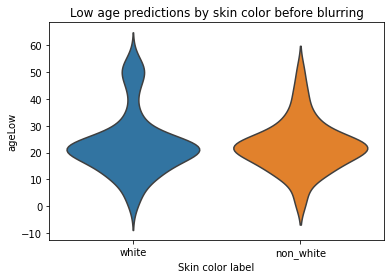

In [ ]:
#results
y_var = 'ageLow'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for ageLow predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageLow predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for ageLow predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageLow predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('Low age predictions by skin color before blurring')
plt.show()

The mean for ageLow predicted for our white group AFTER blurring is: 22.496
The mean for ageLow predicted for our non_white group AFTER blurring is: 20.891

The std for ageLow predicted for our white group AFTER blurring is: 12.128
The std for ageLow predicted for our non_white group AFTER blurring is: 8.428


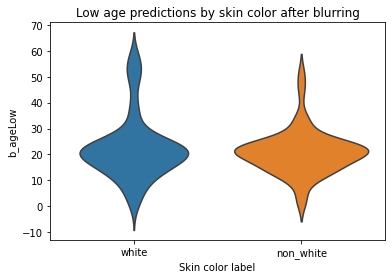

In [ ]:
#results
y_var = 'b_ageLow'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for ageLow predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageLow predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for ageLow predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageLow predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('Low age predictions by skin color after blurring')
plt.show()

### ageHigh var

The mean for ageHigh predicted for our white group BEFORE blurring is: 36.016
The mean for ageHigh predicted for our non_white group BEFORE blurring is: 35.261

The std for ageHigh predicted for our white group BEFORE blurring is: 14.15
The std for ageHigh predicted for our non_white group BEFORE blurring is: 12.032


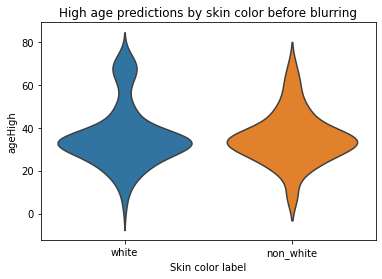

In [ ]:
#results
y_var = 'ageHigh'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for ageHigh predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageHigh predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for ageHigh predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageHigh predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('High age predictions by skin color before blurring')
plt.show()

The mean for ageHigh predicted for our white group AFTER blurring is: 36.016
The mean for ageHigh predicted for our non_white group AFTER blurring is: 35.261

The std for ageHigh predicted for our white group AFTER blurring is: 14.15
The std for ageHigh predicted for our non_white group AFTER blurring is: 12.032


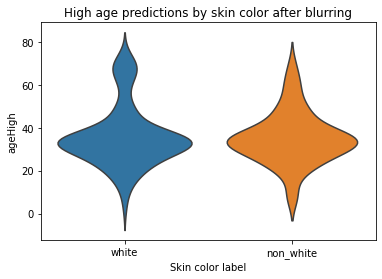

In [ ]:
#results
y_var = 'ageHigh'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for ageHigh predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageHigh predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for ageHigh predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for ageHigh predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('High age predictions by skin color after blurring')
plt.show()

As we could observe from the result, no matter we have a blurred image or not, the mean age high and age low for the non-white group is lower than those of the white group. This is interesting as the machine recognizes white people to be older than the non-white people. We wonder if it is because the light skin tone of white people makes it easier for the machine to pick up wrinkles and spots on their faces, which are signs of older ages. 

The variance in the age prediction is also higher in the white group. This could be because we have more white people in the sample - it makes sense to have higher variance in their ages. 


# Gender

## Regression Comparison

###Non-White

In [ ]:
grouped_df = dataframe.groupby(['sc_label'])
grouped_df.groups

{'non_white': [5, 8, 11, 20, 26, 29, 32, 33, 35, 36, 38, 47, 49, 53, 55, 56, 57, 61, 62, 67, 73, 75, 76, 78, 87, 90, 99, 101, 108, 109, 115, 123, 124, 128, 129, 131, 138, 139, 154, 155, 156, 159, 162, 164, 166, 168], 'white': [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 34, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 54, 58, 59, 60, 63, 64, 65, 66, 68, 69, 70, 71, 72, 74, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 130, 132, 133, 134, 135, ...]}

In [ ]:
nw_b_g = grouped_df.get_group('non_white')["genderConfidence"]
nw_a_g = grouped_df.get_group('non_white')["b_genderConf"]

In [ ]:
#wgetting the data
import os

#Pandas setup
import pandas as pd

#importing MatPlotLib
import matplotlib.pyplot as plt

#importing numpy
import numpy as np

#importing lin regression model
from scipy.stats import linregress

In [ ]:
regression_nwg = linregress(nw_b_g, nw_a_g)
regression_nwg

LinregressResult(slope=0.5521273294401473, intercept=43.58357603017377, rvalue=0.6661119621131476, pvalue=4.362734577430304e-07, stderr=0.09320048980034114)

In [ ]:
fx = np.array([nw_b_g.min(), nw_b_g.max() + 1])
fy = regression_nwg.intercept + regression_nwg.slope * fx

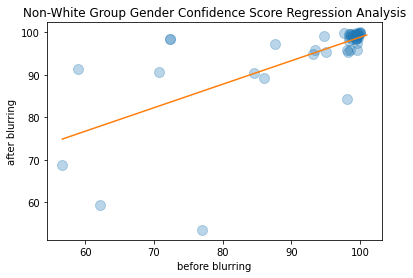

In [ ]:
plt.plot(nw_b_g, nw_a_g, 'o', alpha=0.3, markersize=10 )
plt.ylabel("after blurring")
plt.xlabel("before blurring")
plt.title("Non-White Group Gender Confidence Score Regression Analysis")
plt.plot(fx, fy, '-')

### White Group

In [ ]:
w_b_g = grouped_df.get_group('white')["genderConfidence"]
w_a_g = grouped_df.get_group('white')["b_genderConf"]

In [ ]:
regression_wg = linregress(w_b_g, w_a_g)
regression_wg

LinregressResult(slope=0.4925545716904273, intercept=48.1897776503087, rvalue=0.5719087399634354, pvalue=1.4483615284228297e-12, stderr=0.06269134758807363)

In [ ]:
fx = np.array([w_b_g.min(), w_b_g.max() + 1])
fy = regression_wg.intercept + regression_wg.slope * fx

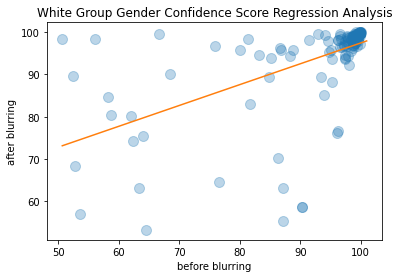

In [ ]:
plt.plot(w_b_g, w_a_g, 'o', alpha=0.3, markersize=10 )
plt.ylabel("after blurring")
plt.xlabel("before blurring")
plt.title("White Group Gender Confidence Score Regression Analysis")
plt.plot(fx, fy, '-')

For the non-white group, we have a regression slope of 0.552. 
For the white group, we have a regression slope of 0.493. 

This tells us that blurring the image improves the machine's ability to identify genders of both white and non-white groups. The difference in the regression slope between the two groups is only about 0.05. This informs us that the machine's ability to identify genders after we blur the images is the same across white and non-white groups.

## Distribution Comparision

In [ ]:
#seperating dataframe for each skin label
white_df = dataframe[dataframe['sc_label']=='white']
non_white_df = dataframe[dataframe['sc_label']=='non_white']
#getting summary stats for by label
white_df_summary = white_df.describe()
non_white_summary = non_white_df.describe()

The mean for gender confidence score predicted for our white group BEFORE blurring is: 92.327
The mean for gender confidence score predicted for our non_white group BEFORE blurring is: 92.998

The std for gender confidence score predicted for our white group BEFORE blurring is: 12.696
The std for gender confidence score predicted for our non_white group BEFORE blurring is: 11.945


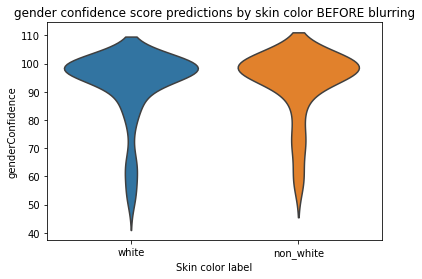

In [ ]:
#results
y_var = 'genderConfidence'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for gender confidence score predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for gender confidence score predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for gender confidence score predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for gender confidence score predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('gender confidence score predictions by skin color BEFORE blurring')
plt.show()

The mean for gender confidence score predicted for our white group AFTER blurring is: 93.666
The mean for gender confidence score predicted for our non_white group AFTER blurring is: 94.93

The std for gender confidence score predicted for our white group AFTER blurring is: 10.935
The std for gender confidence score predicted for our non_white group AFTER blurring is: 9.901


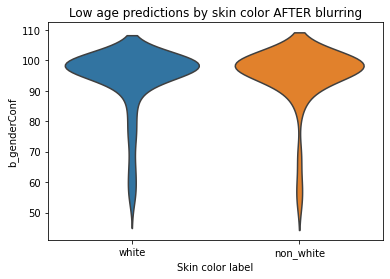

In [ ]:
#results
y_var = 'b_genderConf'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for gender confidence score predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for gender confidence score predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for gender confidence score predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for gender confidence score predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('Low age predictions by skin color AFTER blurring')
plt.show()

As we could observe from the result, no matter we have a blurred image or not, the mean gender confidence score for the non-white group is higher than the mean gender confidence score of the white group. Moreover, the standard deviation of scores for the non-white group is lower than that of the white group. However, the difference in mean and standard deviation between white and non-white group are both small. For mean, the difference is about one unit in both normal and blurred cases.  For the std, the difference is also about one unit in both cases. This tells us that even though the machine is slightly more confident and consistent in predicting the gender of the non-white group, it doesn’t really have a bias towards the white group. 

#Emotion

## Regression Comparison

###Non-White

In [ ]:
grouped_df = dataframe.groupby(['sc_label'])
grouped_df.groups

{'non_white': [5, 8, 11, 20, 26, 29, 32, 33, 35, 36, 38, 47, 49, 53, 55, 56, 57, 61, 62, 67, 73, 75, 76, 78, 87, 90, 99, 101, 108, 109, 115, 123, 124, 128, 129, 131, 138, 139, 154, 155, 156, 159, 162, 164, 166, 168], 'white': [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 30, 31, 34, 37, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 54, 58, 59, 60, 63, 64, 65, 66, 68, 69, 70, 71, 72, 74, 77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 130, 132, 133, 134, 135, ...]}

In [ ]:
nw_b_e = grouped_df.get_group('non_white')["emotionConfidence"]
nw_a_e = grouped_df.get_group('non_white')["b_emotionConf"]

In [ ]:
regression_nwe = linregress(nw_b_e, nw_a_e)
regression_nwe

LinregressResult(slope=0.7526255003950559, intercept=20.12896231864343, rvalue=0.7446431822949315, pvalue=2.9736826930856234e-09, stderr=0.1017024489511183)

In [ ]:
fx = np.array([nw_b_e.min(), nw_b_e.max() + 1])
fy = regression_nwe.intercept + regression_nwe.slope * fx

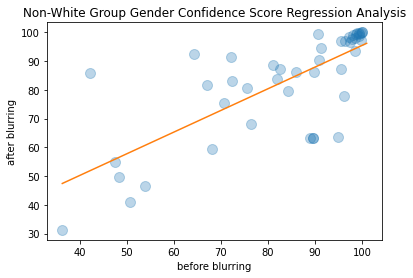

In [ ]:
plt.plot(nw_b_e, nw_a_e, 'o', alpha=0.3, markersize=10 )
plt.ylabel("after blurring")
plt.xlabel("before blurring")
plt.title("Non-White Group Gender Confidence Score Regression Analysis")
plt.plot(fx, fy, '-')

###White Group

In [ ]:
w_b_e = grouped_df.get_group('white')["emotionConfidence"]
w_a_e = grouped_df.get_group('white')["b_emotionConf"]

In [ ]:
regression_we = linregress(w_b_e, w_a_e)
regression_we

LinregressResult(slope=0.6105276581575648, intercept=34.245522594766875, rvalue=0.6496828133755648, pvalue=8.132369522571195e-17, stderr=0.0633917953305233)

In [ ]:
fx = np.array([w_b_e.min(), w_b_e.max() + 1])
fy = regression_we.intercept + regression_we.slope * fx

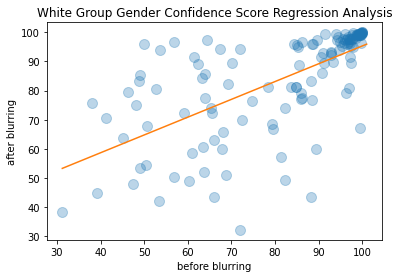

In [ ]:
plt.plot(w_b_e, w_a_e, 'o', alpha=0.3, markersize=10 )
plt.ylabel("after blurring")
plt.xlabel("before blurring")
plt.title("White Group Gender Confidence Score Regression Analysis")
plt.plot(fx, fy, '-')

For the non-white group, we have a regression slope of 0.753. For the white group, we have a regression slope of 0.611.

This tells us that blurring the image improves the machine's ability to identify emotion of both white and non-white groups. The difference in the regression slope between the two groups is a decent amount at about 0.14. This informs us that the machine's ability to identify emotion after we blur the images is not the same across white and non-white groups and improves more for non-white groups.

##Distribution Comparison

In [ ]:
#seperating dataframe for each skin label
white_df = dataframe[dataframe['sc_label']=='white']
non_white_df = dataframe[dataframe['sc_label']=='non_white']
#getting summary stats for by label
white_df_summary = white_df.describe()
non_white_summary = non_white_df.describe()

The mean for emotion confidence score predicted for our white group BEFORE blurring is: 81.492
The mean for emotion confidence score predicted for our non_white group BEFORE blurring is: 83.775

The std for emotion confidence score predicted for our white group BEFORE blurring is: 18.569
The std for emotion confidence score predicted for our non_white group BEFORE blurring is: 17.932


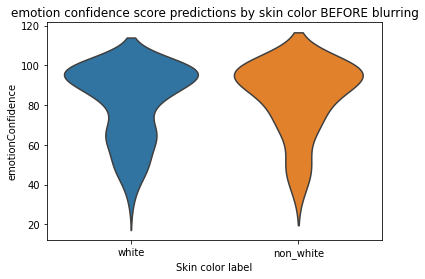

In [ ]:
#results
y_var = 'emotionConfidence'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for emotion confidence score predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for emotion confidence score predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for emotion confidence score predicted for our white group BEFORE blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for emotion confidence score predicted for our non_white group BEFORE blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('emotion confidence score predictions by skin color BEFORE blurring')
plt.show()

The mean for emotion confidence score predicted for our white group AFTER blurring is: 83.999
The mean for emotion confidence score predicted for our non_white group AFTER blurring is: 83.18

The std for emotion confidence score predicted for our white group AFTER blurring is: 17.45
The std for emotion confidence score predicted for our non_white group AFTER blurring is: 18.124


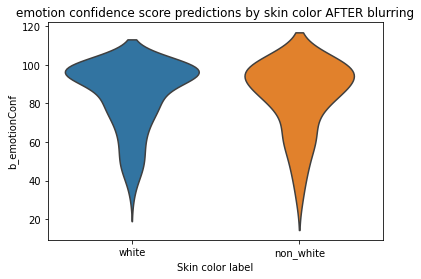

In [ ]:
#results
y_var = 'b_emotionConf'
stat = 'mean'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)

print('The ' + stat + ' for emotion confidence score predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for emotion confidence score predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

print('')

stat = 'std'
stat_result_white = get_stat(white_df_summary, y_var, stat)
stat_result_nonwhite = get_stat(non_white_summary, y_var, stat)
print('The ' + stat + ' for emotion confidence score predicted for our white group AFTER blurring is: ' + str(stat_result_white))
print('The ' + stat + ' for emotion confidence score predicted for our non_white group AFTER blurring is: ' + str(stat_result_nonwhite))

#graph
sns.violinplot(x = 'sc_label', y = y_var, data = dataframe, inner= None)

plt.xlabel('Skin color label')
plt.ylabel(y_var)
plt.title('emotion confidence score predictions by skin color AFTER blurring')
plt.show()

As we could observe from the result, for a normal picture, the mean emotion confidence score is higher for non-white groups by about 2 units. However, after we blurred the images, the mean emotion confidence score is higher for white groups by about 0.8 units. Before the blurring, the machin is more confident at telling the emotion of non-white people. After the blurring, the machine is slightly more confident at telling the emotion of white people. However, the difference of gender condifence scores across the groups is not significant in both scenarios. Therefore, we could say that the machine doesn’t really have a bias towards either group. The machine has about the same confidence and consistency in predicting the emotions of the non-white group and white group.

For variation, for a normal picture, the std of emotion confidence score is higher for white groups by about 1 unit. However, after we blurred the images, the std of emotion confidence score is higher for non-white groups by about 0.5 unit. Both different are not very significant. 


# Summary

## Age

We found that age generally decreases after we apply the blurring filter. This makes sense as the blurring filter softens wrinkles on faces and ML model would consider them to be younger. 
However, people who look younger before the blurring have higher predicted age after blurring. This could suggest that for young people who don't have many wrinkles and spots, the blurring filter makes their facial features less apparent, so the machine is less able to detect their true age. 

## Emotion 

Blurring the pictures would slightly enhances the machine's ability to detect emotion, which is a surprising finding. Our guess is that AWS Rekognition over simplifies some facial features when it is calculating the emotion. When we blurred the images, some facial details were lost, which made it easier for the machine to simplify the facial features and thus improved its confidence score.

## Gender

Blurring the pictures would slightly improves the machine's ability to detect gender, which is a surprising finding. Our guess for this is similar to our guess to emotion  - AWS Rekognition over simplifies some facial features when it is calculating the emotion. When we blurred the images, some facial details were lost, which made it easier for the machine to simplify the facial features and thus improved its confidence score.


## Metrics

With supervised ML models, an important metric that pops up is accuracy. With labeled data, ML models usually are trained to reduce the misclassification error. As the images are blurred, details are lost in the picture so it is worth looking at whether the ML model reproduces the same labels. So we will look at consistency as an evaluation metric. 

After blurring, we observed that AWS changes its emotion labeling on five people with the inconsistency rate of 2.9%. Among the five changes, three of them are from SAD to CALM, and one is from FEAR to DISGUSTED. These emotions all have similar facial expressions. Even a real human being may not be able to easily distinguish between them. Therefore, we could say that blurring only slightly hinders the machine's ability to detect emotions. 

After blurring, AWS identifies more females than before. This makes sense as males have sharper facial features, and blurring the image would soften edges on male faces. Therefore, the machine would miscalculate some males as females after blurring. The inconsistency rate is only 5.7%, which is not a huge impact. 



##Racial Analysis

### Age

The machine recognizes white people to be older than the non-white people. We wonder if it is because the light skin tone of white people makes it easier for the machine to pick up wrinkles and spots on their faces, which are signs of old ages. 

### Gender

Even though the machine is slightly more confident and consistent in predicting the gender of the non-white group, it doesn’t really have a bias towards the white group. 

### Emotion

The machine doesn’t have a bias towards either group. The machine has about the same confidence and consistency in predicting the emotions of the non-white group and white group.